# Name: Farah Sartaj
# Subject:ANN

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 10)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4,

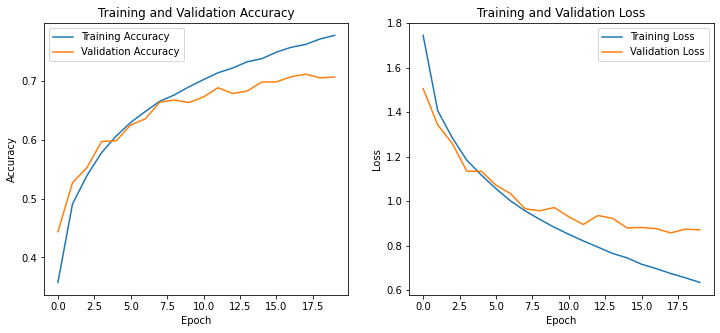

In [2]:
# Step 1: Import Required Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 2: Load and Preprocess the CIFAR-10 Dataset
# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Print dataset shapes
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

# Step 3: Build the CNN Model
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Fully connected layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Step 4: Train the Model
history = model.fit(x_train, y_train,
                    epochs=20,                # Number of epochs
                    batch_size=128,          # Batch size
                    validation_split=0.2,    # Use 20% of training data for validation
                    verbose=1)

# Step 5: Evaluate the Model
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 6: Plot Training and Validation Accuracy/Loss
# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

1/1 [==============================] - 0s 18ms/step


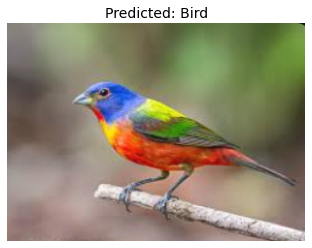

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# CIFAR-10 class labels
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", 
               "Dog", "Frog", "Horse", "Ship", "Truck"]

# Load and preprocess the image
img_path = "birds.png"  # Replace with your image path
img = image.load_img(img_path, target_size=(32, 32))  # Resize to CIFAR-10 dimensions
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make prediction
predictions = model.predict(img_array)
class_idx = np.argmax(predictions)  # Get class with highest probability
predicted_label = class_names[class_idx]

# Display image with prediction
plt.imshow(image.load_img(img_path))  # Load and show the original image
plt.title(f"Predicted: {predicted_label}", fontsize=14)
plt.axis("off")  # Hide axes
plt.show()
